## Darian Gurrola

## Course Instructor: Dr. Keiona Middleton

## A1. 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The question being investigated for this analysis is "What is the optimal number of principal components that can be identified in the churn dataset?".  This question will be answered using principal component analysis.

## A2. 

The primary goal of this analysis is to reduce the number of dimensions using principal component analysis (PCA).  

## B1. 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Principal componant analysis will be used to reduce the amount of variables in the analysis.  This method makes it easier for machine learning algorithms to process large amounts of data while retaining the most information possible.  PCA reduces the number of variables in the dataset by combining them into groups called principal components.  It begins by assigning the maximum amount of information possible into the first component, then maximum remaining information in the second and so on (Jaadi, 2024).  The expected outcome of this process is to retain only the principal components with the most information.  This will allow us perform future analyses with fewer variables.

## B2. 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;One assumption of principal component analysis is that a linear relationship exists between all variables.  This is because PCA relies on Pearson correlation coefficients, which measures linear correlation between different variables (Laerd Statistics).  A violation of this assumption could result in principal components that do not capture the most variance possible.  To test this assumption, I will generate a correlation heatmap with my selected variables. 

## C1. 

Below are is a list of variables used in the analysis.

<ul>
    <li>Population</li>
    <li>Children</li>
    <li>Age</li>
    <li>Income</li>
    <li>Outage_sec_perweek</li>
    <li>Yearly_equip_failure</li>
    <li>Tenure</li>
    <li>MonthlyCharge</li>
    <li>Bandwidth_GB_Year</li>
</ul>

## C2. 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Before standardizing the variables for this analysis.  There are a few steps required to preprocess the data.  The first step, I took was to import the necessary libraries required for data exploration and cleaning.  I used pandas to import and manipulate the initial data, numpy to perform calculations, matplotlib and seaborn to create visualizations, and lastly scikit-learn to scale the data.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;After importing the necessary libraries, I imported the "churn_clean.csv" file using the read_csv() method from pandas.  I then performed data exploration by inspecting the dataset and selecting variables for the analysis.  The selected variables were imported into a new dataframe called "df_churn".

In [10]:
df_initial = pd.read_csv('churn_clean.csv')

In [11]:
print(df_initial.head())

   CaseOrder Customer_id                           Interaction  \
0          1     K409198  aa90260b-4141-4a24-8e36-b04ce1f4f77b   
1          2     S120509  fb76459f-c047-4a9d-8af9-e0f7d4ac2524   
2          3     K191035  344d114c-3736-4be5-98f7-c72c281e2d35   
3          4      D90850  abfa2b40-2d43-4994-b15a-989b8c79e311   
4          5     K662701  68a861fd-0d20-4e51-a587-8a90407ee574   

                                UID         City State                 County  \
0  e885b299883d4f9fb18e39c75155d990  Point Baker    AK  Prince of Wales-Hyder   
1  f2de8bef964785f41a2959829830fb8a  West Branch    MI                 Ogemaw   
2  f1784cfa9f6d92ae816197eb175d3c71      Yamhill    OR                Yamhill   
3  dc8a365077241bb5cd5ccd305136b05e      Del Mar    CA              San Diego   
4  aabb64a116e83fdc4befc1fbab1663f9    Needville    TX              Fort Bend   

     Zip       Lat        Lng  ...  MonthlyCharge Bandwidth_GB_Year Item1  \
0  99927  56.25100 -133.37571  ...     

In [12]:
#Assign quantitative continuous variables to df_churn
df_churn = df_initial[["Population", "Children", "Age", "Income", "Outage_sec_perweek", "Yearly_equip_failure", "Tenure", "MonthlyCharge", "Bandwidth_GB_Year"]]

In [13]:
print(df_churn.head())

   Population  Children  Age    Income  Outage_sec_perweek  \
0          38         0   68  28561.99            7.978323   
1       10446         1   27  21704.77           11.699080   
2        3735         4   50   9609.57           10.752800   
3       13863         1   48  18925.23           14.913540   
4       11352         0   83  40074.19            8.147417   

   Yearly_equip_failure     Tenure  MonthlyCharge  Bandwidth_GB_Year  
0                     1   6.795513     172.455519         904.536110  
1                     1   1.156681     242.632554         800.982766  
2                     1  15.754144     159.947583        2054.706961  
3                     0  17.087227     119.956840        2164.579412  
4                     1   1.670972     149.948316         271.493436  


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;To explore the data, I generated summary statistics for each of the selected variables using the "describe()" method from the pandas library.  I also generated a correlation heatmap to see if any relationships exist betwen them.  From the heatmap, we can see that only tenure and bandwidth_GB_year are correlated.  This means that the PCA assumption discussed earlier has not been met.

In [15]:
df_churn["Population"].describe()

count     10000.000000
mean       9756.562400
std       14432.698671
min           0.000000
25%         738.000000
50%        2910.500000
75%       13168.000000
max      111850.000000
Name: Population, dtype: float64

In [16]:
df_churn["Children"].describe()

count    10000.0000
mean         2.0877
std          2.1472
min          0.0000
25%          0.0000
50%          1.0000
75%          3.0000
max         10.0000
Name: Children, dtype: float64

In [17]:
df_churn["Age"].describe()

count    10000.000000
mean        53.078400
std         20.698882
min         18.000000
25%         35.000000
50%         53.000000
75%         71.000000
max         89.000000
Name: Age, dtype: float64

In [18]:
df_churn["Income"].describe()

count     10000.000000
mean      39806.926771
std       28199.916702
min         348.670000
25%       19224.717500
50%       33170.605000
75%       53246.170000
max      258900.700000
Name: Income, dtype: float64

In [19]:
df_churn["Outage_sec_perweek"].describe()

count    10000.000000
mean        10.001848
std          2.976019
min          0.099747
25%          8.018214
50%         10.018560
75%         11.969485
max         21.207230
Name: Outage_sec_perweek, dtype: float64

In [20]:
df_churn["Yearly_equip_failure"].describe()

count    10000.000000
mean         0.398000
std          0.635953
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          6.000000
Name: Yearly_equip_failure, dtype: float64

In [21]:
df_churn["Tenure"].describe()

count    10000.000000
mean        34.526188
std         26.443063
min          1.000259
25%          7.917694
50%         35.430507
75%         61.479795
max         71.999280
Name: Tenure, dtype: float64

In [22]:
df_churn["MonthlyCharge"].describe()

count    10000.000000
mean       172.624816
std         42.943094
min         79.978860
25%        139.979239
50%        167.484700
75%        200.734725
max        290.160419
Name: MonthlyCharge, dtype: float64

In [23]:
df_churn["Bandwidth_GB_Year"].describe()

count    10000.000000
mean      3392.341550
std       2185.294852
min        155.506715
25%       1236.470827
50%       3279.536903
75%       5586.141370
max       7158.981530
Name: Bandwidth_GB_Year, dtype: float64

<Axes: >

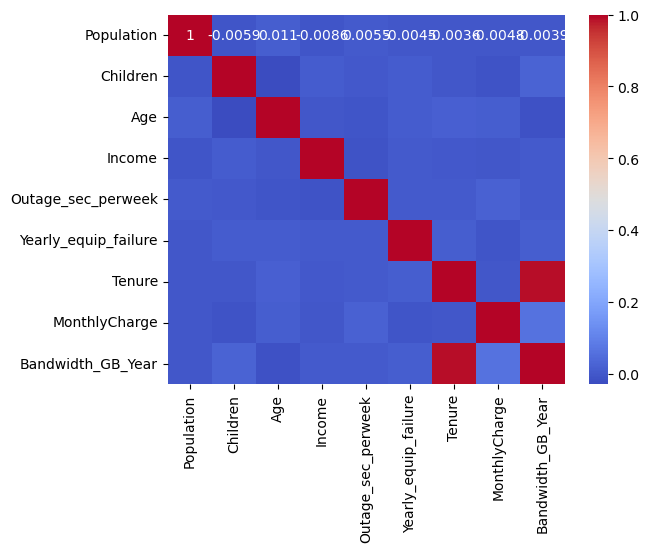

In [24]:
#Check for correlation between quantitative variables
sns.heatmap(data=df_churn.corr(), annot=True, cmap="coolwarm")

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The next step was to clean the data.  To do this, I would need to detect and treat missing values, duplicates, and outliers.  To determine if there were any missing values, I used the "isnull()" and "sum()" method on df_churn.  The output indicated that there were no missing values in the dataset.  I then checked for duplicate rows using the "duplicated()" and "value_counts()" methods on df_churn.  The output confirmed that there were also no duplicates.  

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;To check for outliers, I generated boxplots for each of the variables.  The output showed that the variables "Population", "Children", "Income", "Outage_sec_perweek", and "Yearly_equip_failure" all contained outliers.  I chose to retain the outliers because they seemed like plausible values and because I did not want to reduce the sample size of the data.

In [26]:
df_churn.isnull().sum()

Population              0
Children                0
Age                     0
Income                  0
Outage_sec_perweek      0
Yearly_equip_failure    0
Tenure                  0
MonthlyCharge           0
Bandwidth_GB_Year       0
dtype: int64

In [27]:
df_churn.duplicated().value_counts()

False    10000
Name: count, dtype: int64

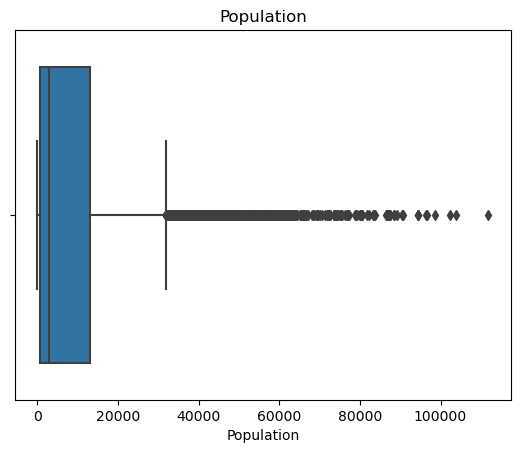

In [28]:
#Detect outliers in Population variable
population_boxplot = sns.boxplot(x="Population", data = df_churn).set_title("Population")

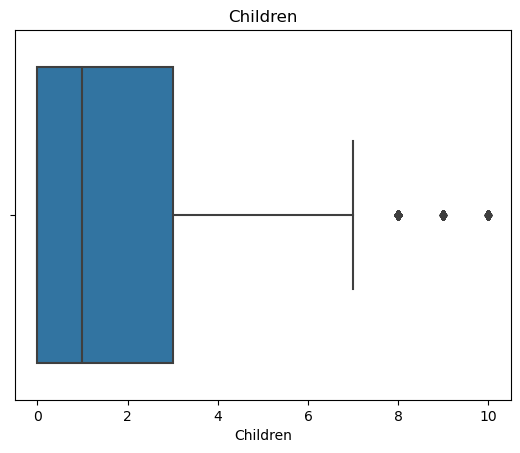

In [29]:
#Detect outliers in Children variable
population_boxplot = sns.boxplot(x="Children", data = df_churn).set_title("Children")

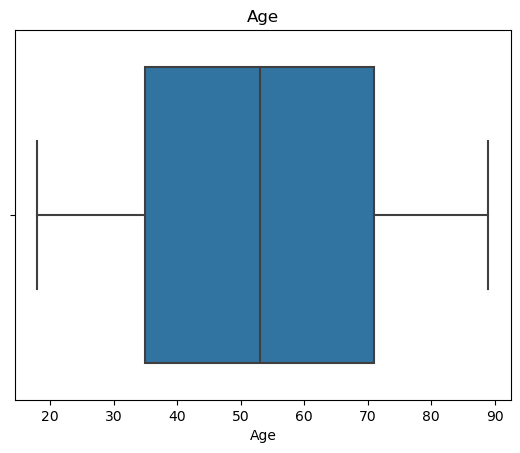

In [30]:
#Detect outliers in Age variable
population_boxplot = sns.boxplot(x="Age", data = df_churn).set_title("Age")

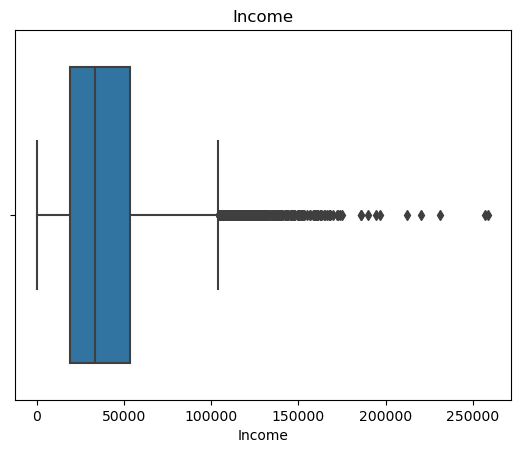

In [31]:
#Detect outliers in Income variable
population_boxplot = sns.boxplot(x="Income", data = df_churn).set_title("Income")

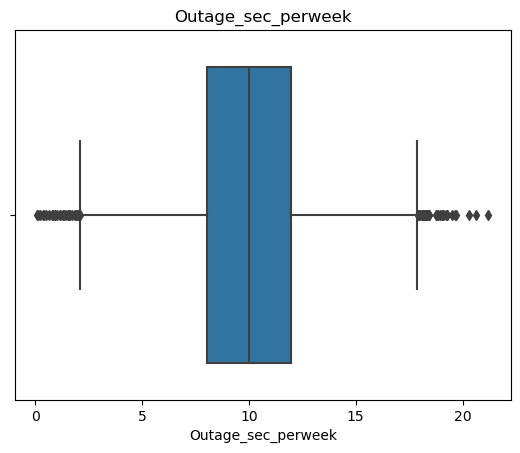

In [32]:
#Detect outliers in Outage_sec_perweek variable
population_boxplot = sns.boxplot(x="Outage_sec_perweek", data = df_churn).set_title("Outage_sec_perweek")

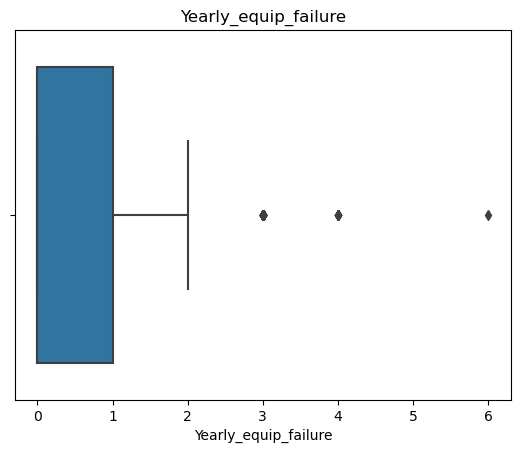

In [33]:
#Detect outliers in Yearly_equip_failure variable
population_boxplot = sns.boxplot(x="Yearly_equip_failure", data = df_churn).set_title("Yearly_equip_failure")

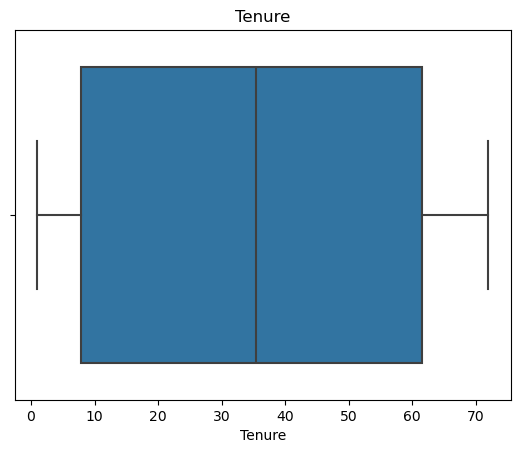

In [34]:
#Detect outliers in Tenure variable
population_boxplot = sns.boxplot(x="Tenure", data = df_churn).set_title("Tenure")

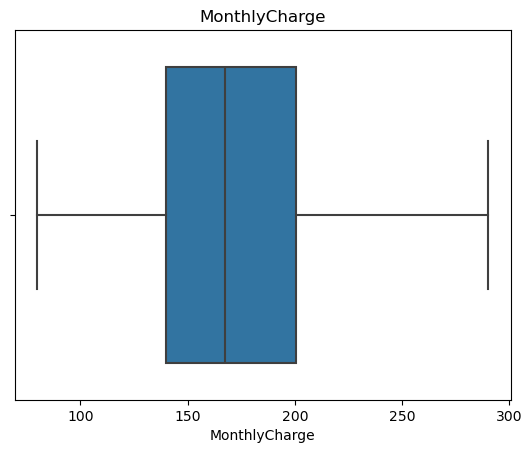

In [35]:
#Detect outliers in MonthlyCharge variable
population_boxplot = sns.boxplot(x="MonthlyCharge", data = df_churn).set_title("MonthlyCharge")

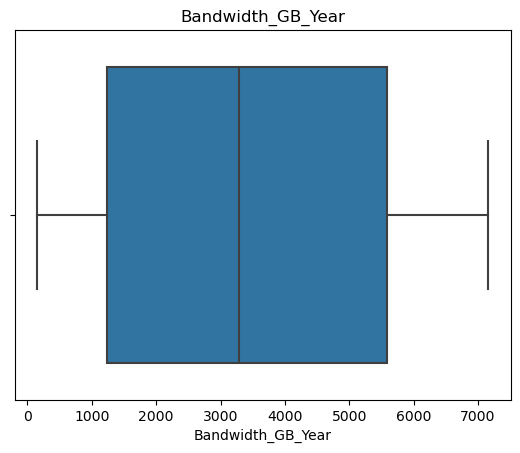

In [36]:
#Detect outliers in Bandwidth_GB_Year variable
population_boxplot = sns.boxplot(x="Bandwidth_GB_Year", data = df_churn).set_title("Bandwidth_GB_Year")

After exploring the data and detecting data quality issues, it was now time to scale the data.  To do this, I initialized the "StandardScaler()" method from scikit-learn and assigned the output to a variable called "scaler".  I then scaled the data using the "fit_transform()" method on df_churn.  The newly scaled variables were then assigned to a final dataframe called df_scaled.

In [38]:
#Assign StandardScaler() to scaler variable
scaler = StandardScaler()

#Scale variables and assign to df_scaled
df_scaled = pd.DataFrame(scaler.fit_transform(df_churn), columns = df_churn.columns)

#Print output
df_scaled.describe()

,Population,Children,Age,Income,Outage_sec_perweek,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year
count,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04
mean,-6.110668e-17,5.542233e-17,-9.556800e-17,5.222489e-17,9.521273e-17,-8.242296e-17,2.273737e-17,-2.529532e-16,9.094947e-17
std,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00
min,-6.760378e-01,-9.723379e-01,-1.694785e+00,-1.399303e+00,-3.327464e+00,-6.258635e-01,-1.267917e+00,-2.157520e+00,-1.481263e+00
25%,-6.249014e-01,-9.723379e-01,-8.734435e-01,-7.299042e-01,-6.665728e-01,-6.258635e-01,-1.006306e+00,-7.602435e-01,-9.865847e-01
50%,-4.743676e-01,-5.065919e-01,-3.787834e-03,-2.353430e-01,5.615783e-03,-6.258635e-01,3.420043e-02,-1.197020e-01,-5.162246e-02
75%,2.363805e-01,4.249001e-01,8.658679e-01,4.765941e-01,6.611971e-01,9.466579e-01,1.019358e+00,6.546178e-01,1.003942e+00
max,7.074113e+00,3.685122e+00,1.735524e+00,7.769694e+00,3.765413e+00,8.809265e+00,1.417195e+00,2.737145e+00,1.723716e+00


A copy of the cleaned and scaled dataset has been included in the attached "churn_preprocessed.csv" file.

In [39]:
#Export to csv file
df_scaled.to_csv("churn_preprocessed.csv")

## D1. 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;To create a principal component matrix, I first initialized the the pca model using the "PCA()" method from scikit-learn.  I then fit the model to my scaled data and created the matrix using the principal components as the index and the variables as the columns.  Please see the code below used to generate the pca matrix.

In [41]:
pca = PCA()
PC = pca.fit_transform(df_scaled)

In [42]:
#Create loading matrix with 9 principal components
loading_matrix = pd.DataFrame(pca.components_, columns = df_scaled.columns, index = ('PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9'))     

#Display loading matrix
loading_matrix

,Population,Children,Age,Income,Outage_sec_perweek,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year
PC1,-0.005648,0.014357,0.001611,0.004214,0.005879,0.017285,0.705566,0.040499,0.707067
PC2,-0.276915,0.600471,-0.561312,0.319552,-0.133707,0.108758,-0.005760,-0.340226,0.008659
PC3,0.034972,-0.213902,0.389730,0.244733,-0.676154,0.217818,0.040055,-0.484677,-0.009635
PC4,-0.590085,-0.080223,0.238096,0.441076,0.098398,0.419104,-0.031699,0.455689,-0.011789
PC5,0.360911,0.197833,0.125560,-0.166468,0.365076,0.783008,0.000002,-0.201553,-0.011062
PC6,0.605521,0.116769,0.071567,0.733881,0.112417,-0.168371,-0.012117,0.186725,0.002507
PC7,0.140596,0.599427,0.239097,-0.276894,-0.488549,0.041815,-0.039050,0.495091,0.003707
PC8,-0.239128,0.417717,0.630708,0.021514,0.361418,-0.348685,0.021464,-0.342552,-0.008236
PC9,-0.000346,-0.021567,0.022356,-0.000942,0.000269,-0.000095,-0.705267,-0.045759,0.706781


## D2. 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;To determine the total number of principal components, I used the Kaiser criterion.  According to this method, only principal components with a value of less than 1 should be retained.  I generated a scree plot with a blue line representing the eigenvalue of the principal component and a red line representing an eigenvalue of 1.  From the scree plot, we can see that the red line intercepts the blue line somewhere between 4 and 5 components.  To confirm which principal components should be retained, I printed the eigenvalue of each component.  The output confirms that the first 5 principal components adhere to the rule.  If I were to use the elbow method for principal component selection, it seems that the first principal component would be the only one retained.  

In [44]:
#Generate covariance matrix
cov_matrix = np.dot(df_scaled.T, df_scaled) / df_churn.shape[0]

#Generate eigenvalues for each component
eigenvalues = [np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)) for eigenvector in pca.components_]

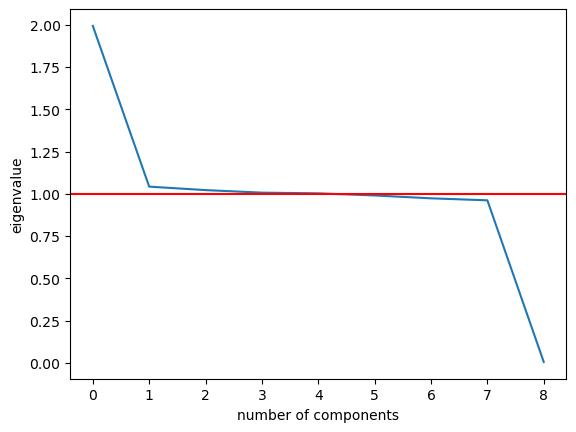

In [45]:
#Generate scree plot with eigenvalues plotted
plt.plot(eigenvalues)
plt.xlabel('number of components')
plt.ylabel('eigenvalue')
plt.axhline(y=1, color="red")
plt.show()

In [46]:
print(eigenvalues)

[1.9937182574015546, 1.0426589195572051, 1.0222161195056874, 1.0070964939573945, 1.0030381494130196, 0.9904884955674753, 0.9735516087419573, 0.9617639822165731, 0.005467973639135371]


## D3. 

Please see the variance (eigenvalues) of the first five principal components below.  

In [48]:
print(eigenvalues[:5])

[1.9937182574015546, 1.0426589195572051, 1.0222161195056874, 1.0070964939573945, 1.0030381494130196]


## D4. 

To identify the total variance captured by the principal components, I used "np.sum()" to add the sum of explained variance ratios for the first five principal components.  As we can see from the output, these components accounts for about 67.43% of the variance in the dataset.  

In [58]:
#obtain total variance of the first 5 principal components
total_variance = np.sum(pca.explained_variance_ratio_[:5])
total_variance

0.6743031044260954

In [55]:
#obtain variance ratio of each individual component
print(pca.explained_variance_ratio_)

[0.22152425 0.11585099 0.11357957 0.11189961 0.11144868 0.11005428
 0.1081724  0.10686266 0.00060755]


## D5. 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;As noted previously, the results of the analysis indicate that there were 5 principal components created from the 9 initial variables.  After generating the explained variance ratio for each principal component we can see that PC1 22.15%.  The remaining 4 principal components each account for roughly 11% of the variance.  Together, the five principal components make up for a 67.43% of the total variance in the dataset.  Now that the number of dimensions has been reduced, the telecommunications company can apply a variety of machine learning algorithms to the data and uncover more beneficial insights.

## E. 

No third-party code was used to support this analysis.

## F. 

Jaadi, Z. (2024, February 23). A Step-by-Step Explanation of Principal Component Analysis (PCA). BuiltIn. https://builtin.com/data-science/step-step-explanation-principal-component-analysis

Principal Components Analysis (PCA) using SPSS Statistics. (n.d.). Laerd Statistics. https://statistics.laerd.com/spss-tutorials/principal-components-analysis-pca-using-spss-statistics.php